In [201]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression as logR
from sklearn.linear_model import LinearRegression as LR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [202]:
sales_df = pd.read_csv("sales.csv")
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


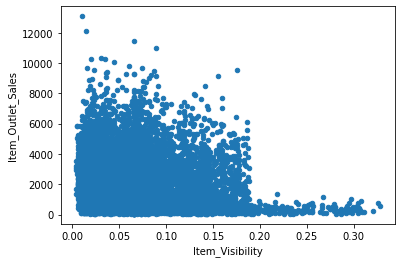

In [253]:
sales_df.plot.scatter(x='Item_Visibility', y='Item_Outlet_Sales')

In [203]:
sales_df.apply(lambda x: sum(x.isnull()), axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [204]:
sales_df.Item_Weight.mode()
sales_df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [205]:
item_wt_mean = sales_df.Item_Weight.mean()
outlet_size_mode = sales_df.Outlet_Size.mode()[0]
sales_df.Item_Weight.fillna(value=item_wt_mean, inplace=True)
sales_df.Outlet_Size.fillna(value=outlet_size_mode, inplace=True)
sales_df.apply(lambda x: sum(x.isnull()), axis=0)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [206]:
sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [207]:
sales_df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [208]:
sales_df.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [209]:
for col in sales_df.columns:
    print (sales_df[col].value_counts())

FDW13    10
FDG33    10
FDW26     9
FDF52     9
FDG09     9
         ..
FDO33     1
FDY43     1
FDT35     1
DRF48     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64
12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
6.895000        2
5.400000        1
7.685000        1
9.420000        1
6.520000        1
Name: Item_Weight, Length: 416, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene    

In [210]:
sales_df.Item_Fat_Content= sales_df.Item_Fat_Content.replace('LF', 'Low Fat')
sales_df.Item_Fat_Content= sales_df.Item_Fat_Content.replace("low fat", "Low Fat")
sales_df.Item_Fat_Content= sales_df.Item_Fat_Content.replace('reg', 'Regular')

In [211]:
print(sales_df.Item_Fat_Content.value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [212]:
sales_df.Item_Visibility = sales_df.Item_Visibility.replace(0, sales_df.Item_Visibility.mean())

In [213]:
#Get the first two characters of ID:
sales_df['Item_Type_Combined'] = sales_df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
sales_df['Item_Type_Combined'] = sales_df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
sales_df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [214]:
sales_df['Outlet_Years'] = 2013 - sales_df.Outlet_Establishment_Year
sales_df.Outlet_Years.describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [215]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [216]:
cat_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined', 'Outlet_Identifier']
for feature in cat_features:
    sales_df[feature] = sales_df[feature].astype('category')
    sales_df[feature] = sales_df[feature].cat.codes

In [217]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1,14
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0,4
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1,14
3,FDX07,19.20,1,0.066132,6,182.0950,0,1998,1,2,0,732.3800,1,15
4,NCD19,8.93,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052,2,26


In [218]:
data = pd.get_dummies(sales_df, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Type_Combined', 'Outlet_Identifier'])

In [219]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                       int8
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Identifier_0            uint8
Outlet_Identifier_1            uint8
Outlet_Identifier_2            uint8
Outlet_Identifier_3            uint8
O

In [220]:
X = data.drop(columns=['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,9.30,0.016047,249.8092,14,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,4,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,14,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.066132,182.0950,15,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.066132,53.8614,26,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


In [221]:
y = data['Item_Outlet_Sales']
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [223]:
lr = LR().fit(X_train, y_train)

In [224]:
yhat= lr.predict(X_test)

In [225]:
metrics.r2_score(y_test, yhat)

0.5504312350754841

In [226]:
np.sqrt(metrics.mean_squared_error(y_test, yhat))

1151.5368940179085

In [227]:
y_test

4065    1845.5976
3612    3149.2340
5584    5077.3908
330      306.2680
1745    3418.8830
          ...    
5029    1133.1916
8270    1937.4780
3117    2746.4250
1552    1304.9680
5702    1118.5440
Name: Item_Outlet_Sales, Length: 2557, dtype: float64

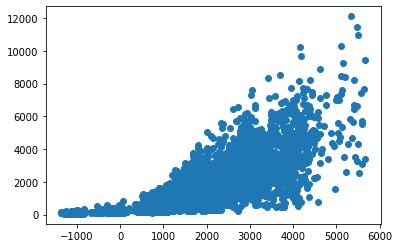

In [228]:
plt.scatter(yhat,y_test)

In [229]:
lr.coef_

array([   -3.58722909,   -72.33088877,    15.74235255,    17.77180468,
         -13.28364066,    13.28364066,  -125.56121668,    88.43694177,
          37.12427491,  -100.70490118,   148.88888864,   -48.18398746,
       -1101.18370354,   331.84816954,    69.48256288,   699.85297112,
          30.60580462,    -7.28431077,   -23.32149385,  -631.50635791,
        -100.70490118,    59.88306327,    69.48256288,  -469.67734563,
         699.85297112,   237.03918149,  -208.48530299,   184.45417668,
         159.66195227])

In [230]:
np.mean(np.absolute(yhat-y_test))

845.9955965749447

In [231]:
np.mean((yhat-y_test)**2)

1326037.2182844116

In [232]:
lrpred = yhat

In [233]:
y_test.max()

12117.56

In [234]:
from sklearn.tree import DecisionTreeRegressor as DTR
dt = DTR(max_depth=15, min_samples_leaf=100).fit(X_train, y_train)

In [235]:
yhat = dt.predict(X_test)

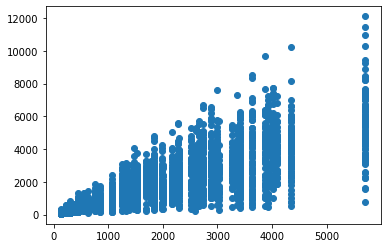

In [236]:
plt.scatter(yhat,y_test)

In [237]:
np.sqrt(metrics.mean_squared_error(y_test, yhat))

1120.9535031020157

In [238]:
metrics.r2_score(y_test, yhat)

0.5739941008137881

In [239]:
dtpred = yhat

In [240]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [241]:
rf = RFR(max_depth=10, n_estimators=200, min_samples_leaf=100).fit(X_train, y_train)
yhat= rf.predict(X_test)

In [242]:
metrics.r2_score(y_test, yhat)

0.5812652716937793

In [243]:
np.sqrt(metrics.mean_squared_error(y_test, yhat))

1111.345979134404

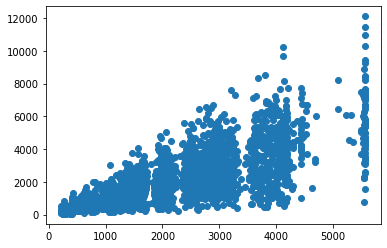

In [244]:
plt.scatter(yhat,y_test)

In [245]:
yhat

array([2643.62544418, 2386.14781698, 2450.45912434, ..., 1592.37937927,
       3276.47581347, 1622.32447391])

In [246]:
rfpred=yhat

In [248]:
yhat = (lrpred+dtpred+rfpred)/3

In [249]:
metrics.r2_score(y_test,yhat)

0.5835690284110431

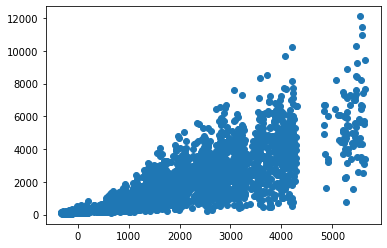

In [250]:
plt.scatter(yhat,y_test)

In [274]:
from sklearn.neighbors import KNeighborsRegressor as KNR
knr = KNR(n_neighbors=7).fit(X_train, y_train)
yhat= knr.predict(X_test)

In [292]:
k=50
scores=np.zeros(k-1)
for i in range(1,k):
    knr =KNR(n_neighbors=i).fit(X_train, y_train)
    yhat=knr.predict(X_train)
    score = metrics.r2_score(y_train,yhat)
    scores[i-1] = score
scores

array([1.        , 0.79099515, 0.72287909, 0.67941572, 0.65194289,
       0.63804855, 0.62393466, 0.61193186, 0.60115591, 0.58921443,
       0.5772063 , 0.56532279, 0.55304152, 0.54587495, 0.53511866,
       0.52822269, 0.51916111, 0.51186247, 0.50379746, 0.49649062,
       0.48954673, 0.48295439, 0.47750675, 0.4716444 , 0.46858596,
       0.46369699, 0.45913069, 0.4546286 , 0.44872029, 0.4439652 ,
       0.43981935, 0.43521584, 0.43126546, 0.42722088, 0.42290027,
       0.41900518, 0.41669112, 0.41279376, 0.41088288, 0.40867867,
       0.40632096, 0.40392766, 0.40223356, 0.40053716, 0.39866978,
       0.39802599, 0.39633174, 0.39475166, 0.39321361, 0.39175005,
       0.39060962, 0.38903886, 0.38753638, 0.38640397, 0.38601637,
       0.38523043, 0.38413414, 0.38314858, 0.382416  , 0.38148969,
       0.38049626, 0.37986136, 0.37955543, 0.37920675, 0.37844378,
       0.37792598, 0.37742648, 0.37627344, 0.37534783, 0.3749365 ,
       0.37472978, 0.37410628, 0.37380694, 0.37298257, 0.37238

In [293]:
k=scores.argmax()+1
knr=KNR(n_neighbors=k).fit(X_train,y_train)
yhat=knr.predict(X_train)

In [294]:
metrics.r2_score(y_train, yhat)

1.0

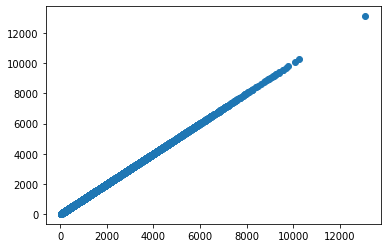

In [295]:
plt.scatter(yhat,y_train)

In [296]:
k

1